In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [3]:
# loading dataset
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Renaming Column Outcome to Label
data.rename(columns={"Outcome":"Label"},inplace=True)

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Checking first few observations
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Checking the data types in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Label                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Checking for missing values
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Label                       False
dtype: bool

In [9]:
#Checking for duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [10]:
#Summary Statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


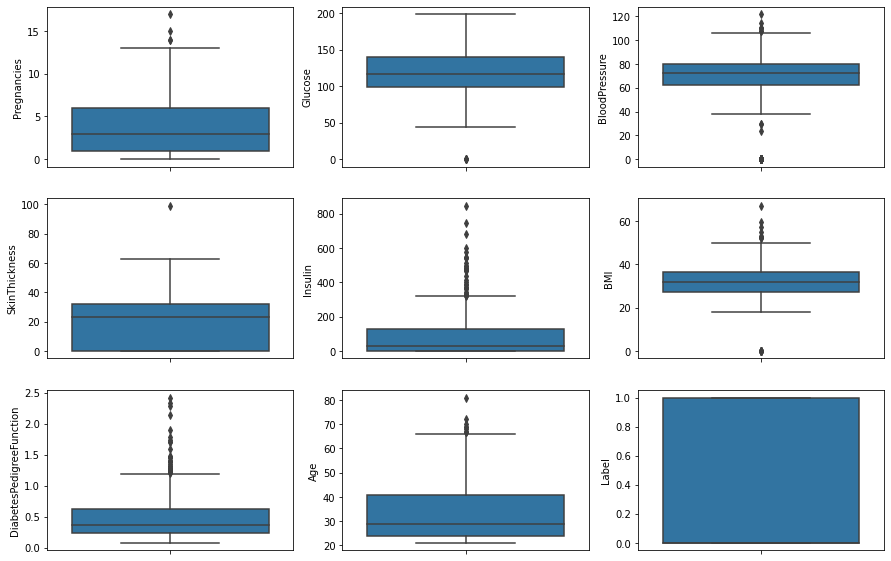

In [11]:
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
sns.boxplot(data=data,y="Pregnancies")
plt.subplot(3,3,2)
sns.boxplot(data=data,y="Glucose")
plt.subplot(3,3,3)
sns.boxplot(data=data,y="BloodPressure")
plt.subplot(3,3,4)
sns.boxplot(data=data,y="SkinThickness")
plt.subplot(3,3,5)
sns.boxplot(data=data,y="Insulin")
plt.subplot(3,3,6)
sns.boxplot(data=data,y="BMI")
plt.subplot(3,3,7)
sns.boxplot(data=data,y="DiabetesPedigreeFunction")
plt.subplot(3,3,8)
sns.boxplot(data=data,y="Age")
plt.subplot(3,3,9)
sns.boxplot(data=data,y="Label")
plt.show()

In [42]:
#create a function to find outliers using IQR
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]   
    return outliers

In [43]:
outliers = find_outliers_IQR(data) 
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
outliers = find_outliers_IQR(data["Insulin"])
print("number of outliers:" + str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers:0
max outlier value: nan
min outlier value: nan


Series([], Name: Insulin, dtype: float64)

In [45]:
def impute_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    upper = data[~(data>(q3+1.5*IQR))].max()
    lower = data[~(data<(q1-1.5*IQR))].min()
    data = np.where(data > upper,data.median(),np.where(data < lower,data.median(),data))                                                          
    return data

In [46]:
#Passing the columns through the function above to transform the outliers into the meadian values of each column.
data["Pregnancies"]=  impute_outliers_IQR(data["Pregnancies"])
data["Glucose"]=  impute_outliers_IQR(data["Glucose"])
data["BloodPressure"]=  impute_outliers_IQR(data["BloodPressure"])
data["SkinThickness"]=  impute_outliers_IQR(data["SkinThickness"])
data["Insulin"]=  impute_outliers_IQR(data["Insulin"])
data["BMI"]=  impute_outliers_IQR(data["BMI"])
data["DiabetesPedigreeFunction"]=  impute_outliers_IQR(data["DiabetesPedigreeFunction"])
data["Age"]=  impute_outliers_IQR(data["Age"])

In [47]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.656250,72.108073,20.437500,53.689779,32.107031,0.407303,32.032552,0.348958
std,3.270644,30.438286,10.874178,15.698554,67.782164,6.284780,0.216130,10.082592,0.476951
min,0.000000,44.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.093750,32.000000,0.371094,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,100.000000,36.100000,0.549500,39.000000,1.000000
max,13.000000,199.000000,104.000000,63.000000,250.000000,48.800000,1.001000,61.000000,1.000000


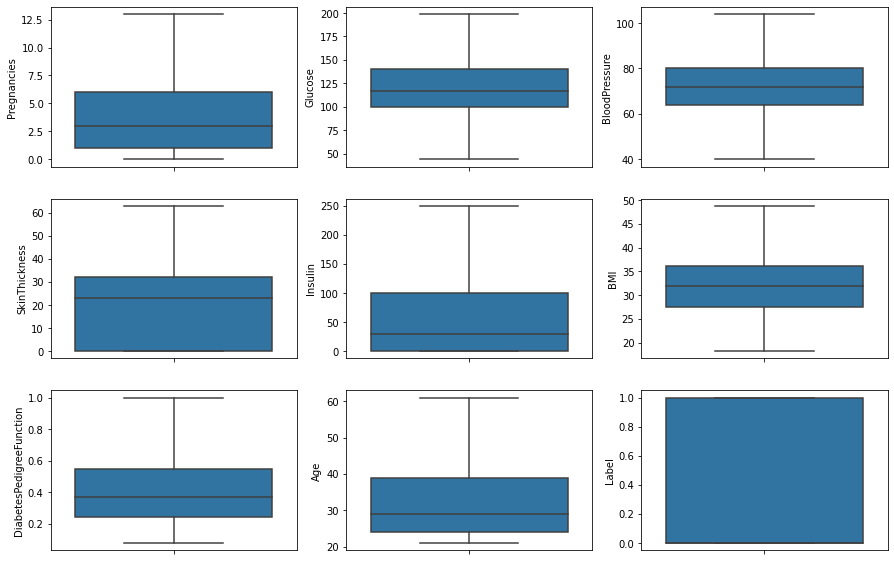

In [48]:
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
sns.boxplot(data=data,y="Pregnancies")
plt.subplot(3,3,2)
sns.boxplot(data=data,y="Glucose")
plt.subplot(3,3,3)
sns.boxplot(data=data,y="BloodPressure")
plt.subplot(3,3,4)
sns.boxplot(data=data,y="SkinThickness")
plt.subplot(3,3,5)
sns.boxplot(data=data,y="Insulin")
plt.subplot(3,3,6)
sns.boxplot(data=data,y="BMI")
plt.subplot(3,3,7)
sns.boxplot(data=data,y="DiabetesPedigreeFunction")
plt.subplot(3,3,8)
sns.boxplot(data=data,y="Age")
plt.subplot(3,3,9)
sns.boxplot(data=data,y="Label")
plt.show()

In [49]:
#Independent Variable
Features=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

In [50]:
X=data[Features]
#Dependent variable
y=data.Label

In [51]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
# Create Decision Tree classifier object
model = DecisionTreeClassifier(max_depth=2,random_state=0)

In [54]:
# Train Decision Tree Classifier
model = model.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [55]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7532467532467533


In [56]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[126,  20],
       [ 37,  48]], dtype=int64)

In [57]:
#Classification report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       146
           1       0.71      0.56      0.63        85

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [58]:
#Prediction for a single item
model.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\HAWA ABDALLAH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**Visualizing Decision Tree**

In [67]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
import graphviz

In [69]:
print(tree.export_text(model)) 

|--- feature_1 <= 129.50
|   |--- feature_5 <= 26.30
|   |   |--- class: 0
|   |--- feature_5 >  26.30
|   |   |--- class: 0
|--- feature_1 >  129.50
|   |--- feature_5 <= 27.85
|   |   |--- class: 0
|   |--- feature_5 >  27.85
|   |   |--- class: 1



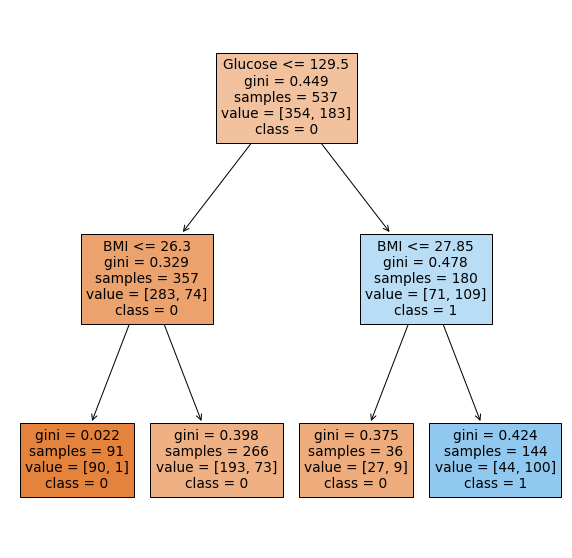

In [71]:
fig,ax=plt.subplots(figsize=(10,10))
a=tree.plot_tree(model,feature_names=Features,class_names=["0","1"],filled=True)